# Web Scraper Skidata

Data from: https://www.skiinfo.de/schweiz/skipaesse

## Libraries and settings

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Define settings for graphics
plt.style.use('dark_background')

## Web Scraper Skidata

In [2]:
# Option (1): Send an HTTP request to the URL
# url = 'https://www.skiinfo.de/schweiz/skipaesse'
# response = requests.get(url)
# html_content = response.content

# Option (2): Read html from file
# Read html from file
with open('skipass.html', 'r') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Locate the table and extract values
table = soup.find('table')

# Extract table headers
headers = [header.get_text().replace('\xa0', '') for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    row_data = [cell.get_text().replace('\xa0', '').strip() for cell in cells]
    rows.append(row_data)

# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

# Change column names
df.columns = ['Skigebiet', 
              'Saisonkarte_Erwachsene', 
              'Saisonkarte_Kinder', 
              'Tageskarte_Erwachsene',
              'Tageskarte_Kinder',
              'Online_Kaufen']

# Show dimensions
print('Number of rows:', df.shape)

# Change data types and remove special characters
df['Saisonkarte_Erwachsene'] = pd.to_numeric(df['Saisonkarte_Erwachsene'].str.replace(',', ''), errors='coerce')
df['Saisonkarte_Kinder'] = pd.to_numeric(df['Saisonkarte_Kinder'].str.replace(',', ''), errors='coerce')
df['Tageskarte_Erwachsene'] = pd.to_numeric(df['Tageskarte_Erwachsene'].str.replace(',', ''), errors='coerce')
df['Tageskarte_Kinder'] = pd.to_numeric(df['Tageskarte_Kinder'].str.replace(',', ''), errors='coerce')

# Write to csv
df.to_csv('skiinfo.csv', index=False)

# Show the first 5 rows
df.describe()

Number of rows: (147, 6)


,Saisonkarte_Erwachsene,Saisonkarte_Kinder,Tageskarte_Erwachsene,Tageskarte_Kinder
count,146.000000,136.000000,138.000000,135.000000
mean,723.945205,312.911765,49.652899,27.664444
std,977.369805,144.385927,18.083643,9.685876
min,1.000000,0.000000,20.000000,0.000000
25%,340.500000,203.000000,35.000000,22.000000
50%,549.000000,299.000000,44.000000,26.000000
75%,899.000000,399.000000,63.750000,31.000000
max,11449.000000,875.000000,95.000000,55.000000


## Histogram of Skiprices

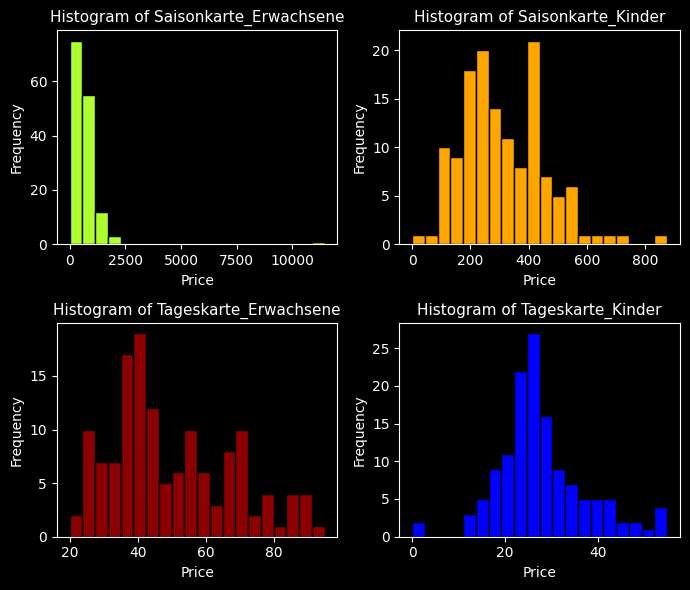

In [3]:
# Histogramme erstellen
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

df['Saisonkarte_Erwachsene'].plot(kind='hist', 
                                  bins=20,
                                  edgecolor='black',
                                  color='greenyellow', 
                                  ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Saisonkarte_Erwachsene', fontsize=11)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

df['Saisonkarte_Kinder'].plot(kind='hist', 
                              bins=20, 
                              edgecolor='black',
                              color='orange',  
                              ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Saisonkarte_Kinder', fontsize=11)
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

df['Tageskarte_Erwachsene'].plot(kind='hist', 
                                 bins=20, 
                                 edgecolor='black',
                                 color='darkred', 
                                 ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Tageskarte_Erwachsene', fontsize=11)
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')

df['Tageskarte_Kinder'].plot(kind='hist', 
                             bins=20, 
                             edgecolor='black',
                             color='blue', 
                             ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Tageskarte_Kinder', fontsize=11)
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [4]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-09 18:58:02
Python Version: 3.11.14
-----------------------------------
